# 2장. 간단한 분류 알고리즘 훈련

길벗출판사의 머신러닝 교과서 실습입니다

---
## 수학적 배경

인공뉴런 : 두개의 클래스가 있는 이진분류 작업으로 볼 수 있다.
여기서 두개의 클래스를 -1, 1이라고 한다.

> 입력값 `x`와 벡터 `w`의 선형 조합으로 결정함수 `phi(z)`를 나타낸다.
선형 조합이란 구성하는 요소끼리 계수를 곱해서 더해서 나올수 있는 조합니다.
다르게 표 현하면 span이라고 볼수 있을것 같다.

최종입력 `z`는 `x`, `z`의 **선형조합**니다. 

$$ z = w_1 x_1 + ... + x_m w_m $$

선형 조합을 각 집합 X, W의 행렬곱으로 표현할수 있다.

$ W = [ w_0 w_1 w_2 .. . w_m ] $는 가중치입니다.

x가 주어졌을때, 그 결과를 예측하기 위해서
단순히 x에다가 어떤 수를 곱한다고 합시다.  
여기서 곱하는 값을 가중치라고 하며 주로 w로 나타냅니다.  

지금은 x가 m개 존재하므로 가중치도 m개가 필요합니다.?
일단 지금은 그렇습니다.

## 회귀?
- 회귀 vs 분류?
- 선형회귀, 로지스틱회귀?

---
### plt.scatter
*plt.scatter( x축 , y축 , options )*

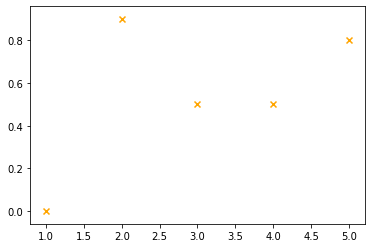

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter([1.0, 2.0, 3.0 ,4.0, 5.0], #x축
            [0.0, 0.9, 0.5, 0.5, 0.8], #y축
            color='orange', marker='x', label='setosa')
plt.show()

---

## 코드를 이해해보자 으
$$ \eta = 에타 $$
파이썬 zip함수 : https://wikidocs.net/32#zip

판다스에서 csv파일 읽기
    `pd.read_csv('04/iris.data', header=None)`


### 퍼셉트론 분류기 클래스  
#### **매개변수**  
eta($ {\eta} $) | *float*  |  학습률 (0.0과 1.0 사이)  
n_iter          | *int*    |  훈련 데이터셋 반복 횟수  
random_state    | *int*    |  가중치 무작위 초기화를 위한 난수 생성기 시드  

#### **속성**  
w_ : *1d-array* : 학습된 가중치  
errors_ : *list* : 에포크마다 누적된 분류 오류  

#### **메서드**  
\_\_init\_\_(**self**, eta=0.01, n_iter=50, random_state=1 ):  
fit(self, X, y):  
net_input(self, X):  
predict(self, X):  

In [226]:
import numpy as np

class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        
        # w_ 에 초기 값을 저장하는 list를 할당한다.
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #요소가 3개짜리 리스트.
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            # x에 따른 y의 예측값을 self.predict(xi)로 구한다.
            # y의 실제 값은 target이다.
            # y의 실제값과 예측값을 비교한다.
            # w_의 차이가 있으면 가중치를 업데이트한다..
            for xi, target in zip(X, y):
                #모든 x에 대하여 반복하는 것이 1에포크이다.(여기서 x는 2개 있으므로 2번 반복?)
                #한번 할때마다 가중치값이 바뀐다.
                #print("xi:", xi, "  w_:", self.w_, "  y:", target, "y_predict: ", self.predict(xi))
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) #update가 0이 아니면 errors증가.
            self.errors_.append(errors) # errors를 요소로 self.errors_에 추가한다.
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        # 입력 : [x x]모양, 출력은 스칼라값으로 나온다.
        # 출력 : x값 곱하기 가중치, 그리고 절편(w_[0]) 을 더함.
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X): 
        """Unit Step Function 를 사용하여 클래스 레이블을 반환합니다"""
        # 입력 : [x x]모양
        # 출력 : 0보다 크면 1, 작으면 -1 반환.
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [155]:
import pandas as pd

df = pd.read_csv('04/iris.data', header=None)

df.head()
#df.tail()

# print(df.head())
#     0    1    2    3            4
# 0  5.1  3.5  1.4  0.2  Iris-setosa
# 1  4.9  3.0  1.4  0.2  Iris-setosa
# 2  4.7  3.2  1.3  0.2  Iris-setosa
# 3  4.6  3.1  1.5  0.2  Iris-setosa
# 4  5.0  3.6  1.4  0.2  Iris-setosa

# print(df.tail())
#       0    1    2    3               4
# 145  6.7  3.0  5.2  2.3  Iris-virginica
# 146  6.3  2.5  5.0  1.9  Iris-virginica
# 147  6.5  3.0  5.2  2.0  Iris-virginica
# 148  6.2  3.4  5.4  2.3  Iris-virginica
# 149  5.9  3.0  5.1  1.8  Iris-virginica

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) #3항 연산자와 비슷함

# 꽃받침 길이와 꽃잎 길이를 추출합니다
# iloc[  ] 으로 df(위의 표) 에서 column의 값이 0,1인 데이터만 가져옴
X = df.iloc[0:100, [0, 2]].values

In [225]:
print("setosa의 꽃받침 길이와 꽃잎 길이")
print("  ", X[0, 0], X[1,0], "...",  X[48,0],  X[49,0])
print("  ", X[0, 1], X[1,1], "...",  X[48,0],  X[49,1])

print("y\n", y)
#print("X\n", X)

setosa의 꽃받침 길이와 꽃잎 길이
   5.1 4.9 ... 5.3 5.0
   1.4 1.4 ... 5.3 1.4
y
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


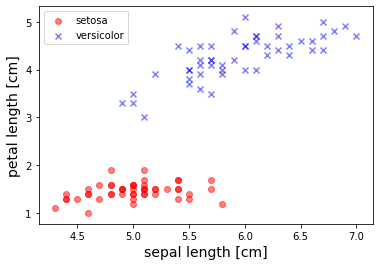

In [192]:
# 산점도를 그립니다
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', alpha=0.5, marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', alpha=0.5, marker='x', label='versicolor')

plt.xlabel('sepal length [cm]',size=14)
plt.ylabel('petal length [cm]',size=14)
plt.legend(loc='upper left')

plt.show()

----
이제부터는 붓꽃 데이터 셋을 선형 분류기로 분류하려고 한다.

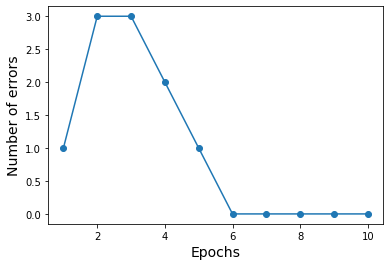

In [193]:
ppn = Perceptron(eta = 0.1, n_iter =10)
ppn.fit(X, y)

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epochs',size=14)
plt.ylabel('Number of errors',size=14)

plt.show()

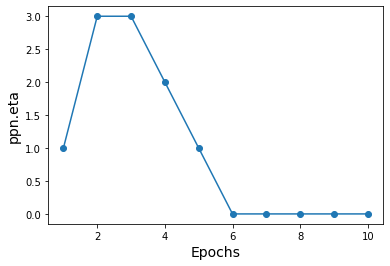

In [227]:
ppn = Perceptron(eta = 0.1, n_iter =10)
ppn.fit(X, y)

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs',size=14)
plt.ylabel('ppn.eta',size=14)

plt.show()